Subscribe to DataSciPie

#  Polynomial Regression
$y = c + m_1  x + m_2 x^2$ 

# Step-1-Import necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step-2-Import Data

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\Dada\Datascipie\Lecture-3\emission_analysis.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Step-3-Data Cleaning

In [4]:
edf=df[['ENGINESIZE','CO2EMISSIONS']]
edf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


# Step-4-Train-Test Split 

In [5]:
mask=np.random.rand(len(edf)) <0.8
train=edf[mask]
test=edf[~mask]

# Step-5-Data Visualization

<function matplotlib.pyplot.show(*args, **kw)>

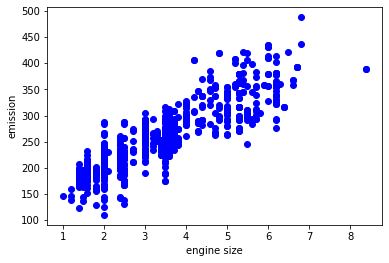

In [6]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('engine size')
plt.ylabel('emission')
plt.show

# Step-6-Creat a polynomial regression Model
Polynomial equation of degree 2 :$y = m_1  x + m_2 x^2$ +c

Linear equation y=mx+c

$
\begin{bmatrix}
    a_1\\
    a_2\\
    \vdots\\
    a_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & a_1 & a_1^2]\\
    [ 1 & a_2 & a_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & a_n & a_n^2]
\end{bmatrix}
$

In [20]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)

reg.fit(train_x_poly,train_y)
print('intercept:',reg.intercept_)
print('coefficient1,coefficient2:',reg.coef_[0][1],reg.coef_[0][2])

intercept: [108.79299712]
coefficient1,coefficient2: 49.82050163271175 -1.4307203414119414


# Step-7-Plot regression polynomial line
Polynomial equation of degree 2 :$y = c + m_1  x + m_2 x^2$

<function matplotlib.pyplot.show(*args, **kw)>

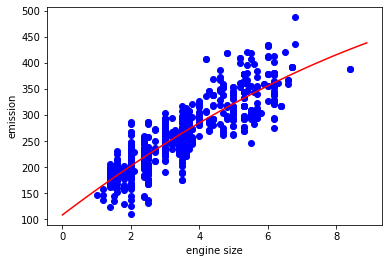

In [24]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('engine size')
plt.ylabel('emission')
pot_x=np.arange(0.0,9.0,0.1)
plt.plot(pot_x,reg.coef_[0][1]*pot_x+reg.coef_[0][2]*pot_x*pot_x+reg.intercept_,color='red')
plt.show

# Step-8-Evaluaion of Model Accuracy

# r2_score
![title](r2.png)

In [26]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_x_poly=poly.fit_transform(test_x)
test_y_pred=reg.predict(test_x_poly)
print('r2_score:',r2_score(test_y_pred,test_y))

r2_score: 0.6785832215823215
